In [1]:
import mlflow
import numpy as np
import seaborn
from urllib.parse import urlparse
import glob
import os
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn.model_selection

import relspecs
import diagnostics
import relspecs
import utils

seaborn.set(rc={'figure.figsize':(27,9)})

def load(prefix):
    return utils.load_npa_artifact("autoencoder_baseline","8cd1cfcb203d4cd294ae806a94b338af",prefix=prefix)


In [2]:
val_mae = load("mae_per_feature_val")
train_mae = load("mae_per_feature_train")


In [3]:
currencies = relspecs.get_codelists()['Currency']
print(currencies[48],currencies[51],currencies[66:69],currencies[152:155])

EUR GBP ['INR', 'IQD', 'IRR'] ['USD', 'USN', 'USS']


In [4]:
rel = relspecs.rels['budget']

(8, 211)
vmin 0.029719006 vmax 1.9407306


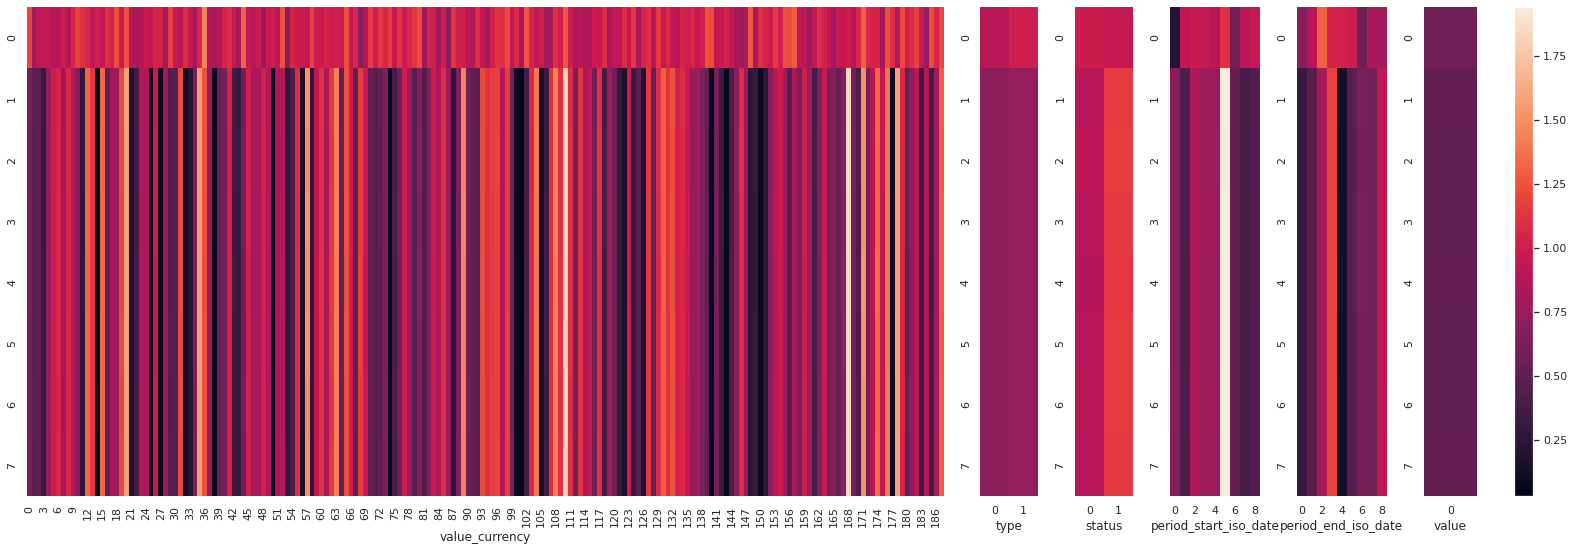

In [5]:
print(val_mae.shape)
_ = diagnostics.heatmaps(val_mae,rel,type_="fields")

vmin 0.03137234 vmax 1.936927


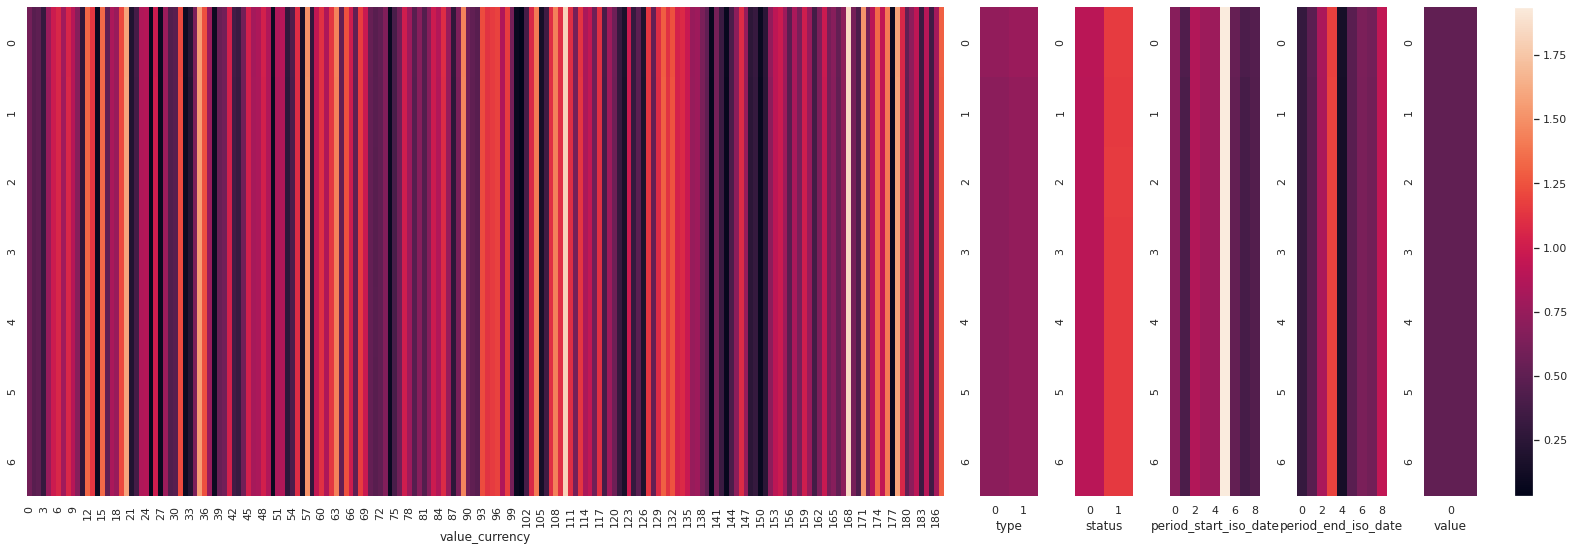

In [6]:
_ = diagnostics.heatmaps(train_mae,rel,type_="fields")

vmin -1.3664745 vmax 0.9369269


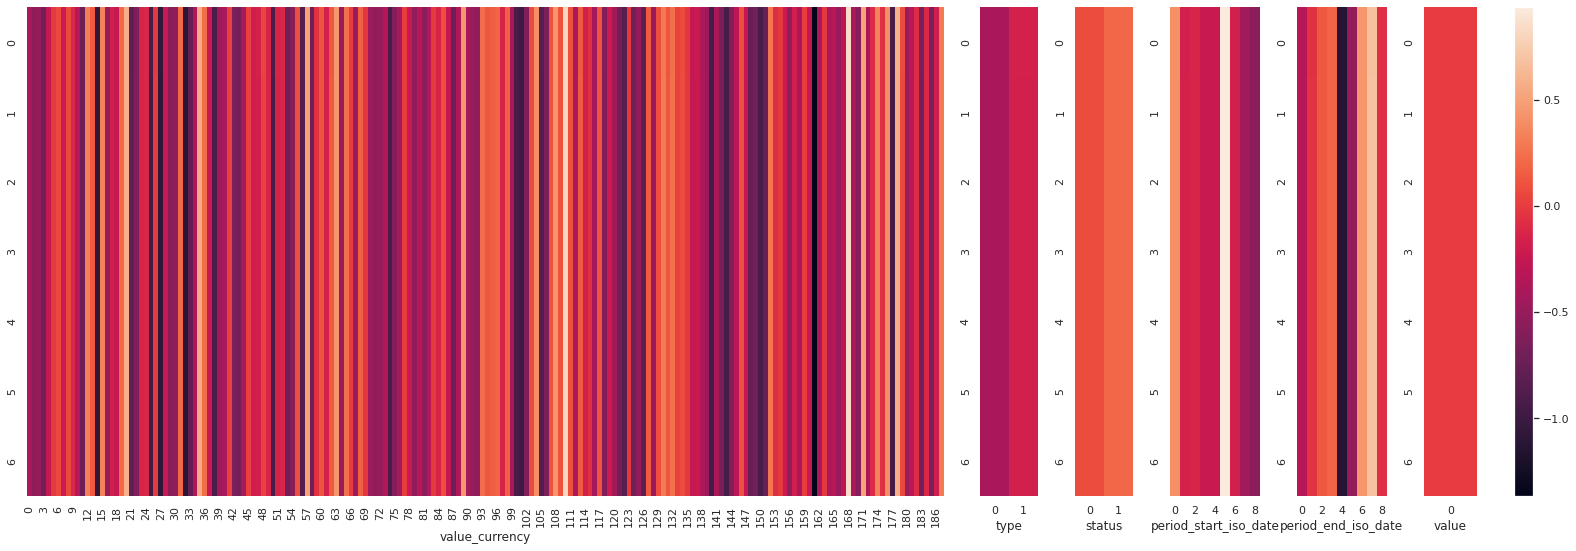

In [7]:
train_output_mean = load("output_mean_per_feature_train")
val_output_mean = load("output_mean_per_feature_val")
_ = diagnostics.heatmaps(train_output_mean,rel,type_="fields")

vmin -1.3725079 vmax 0.9407842


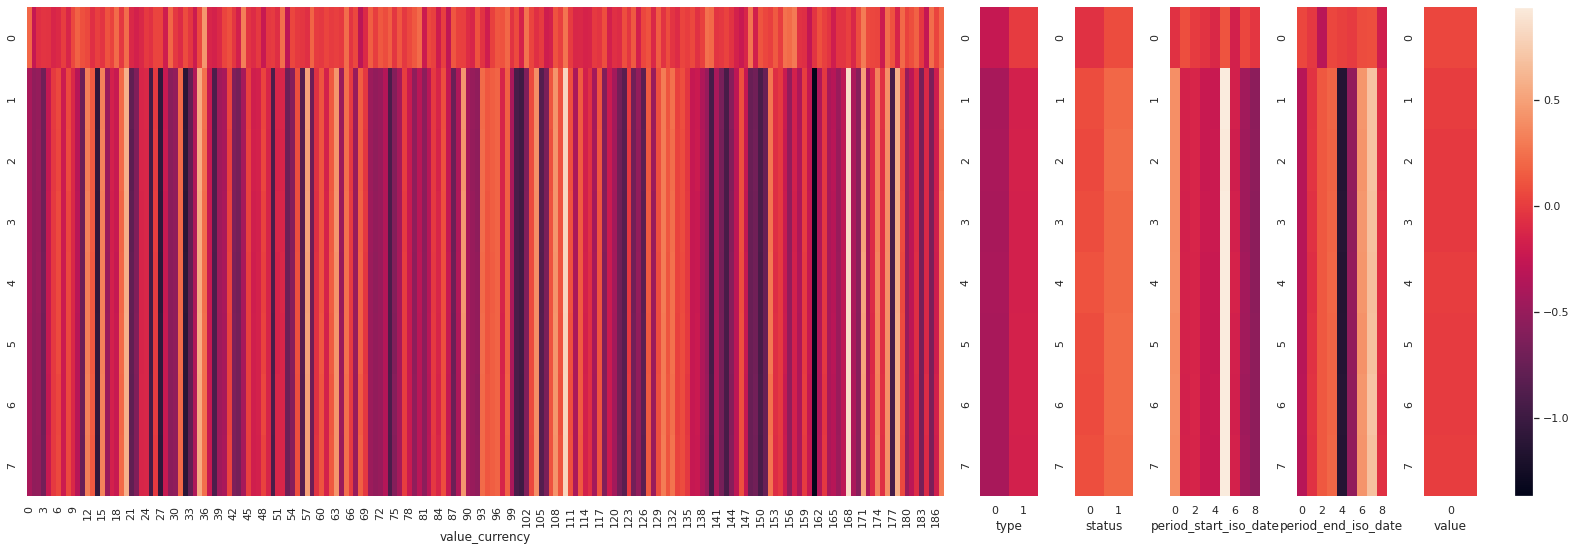

In [8]:
_ = diagnostics.heatmaps(val_output_mean,rel,type_="fields")

vmin 0.00035928894 vmax 0.09612843


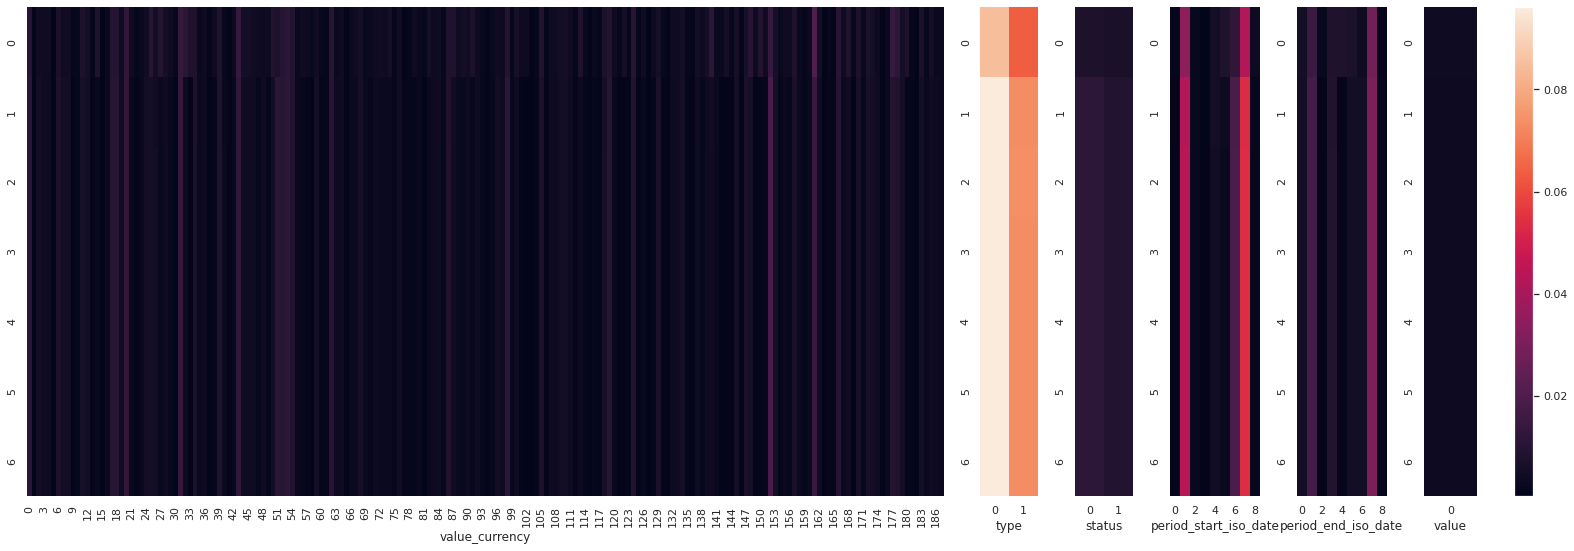

In [9]:
train_output_var = load("output_var_per_feature_train")
val_output_var = load("output_var_per_feature_val")
_ = diagnostics.heatmaps(train_output_var,rel,type_="fields")

vmin 1.1039299e-05 vmax 0.097091794


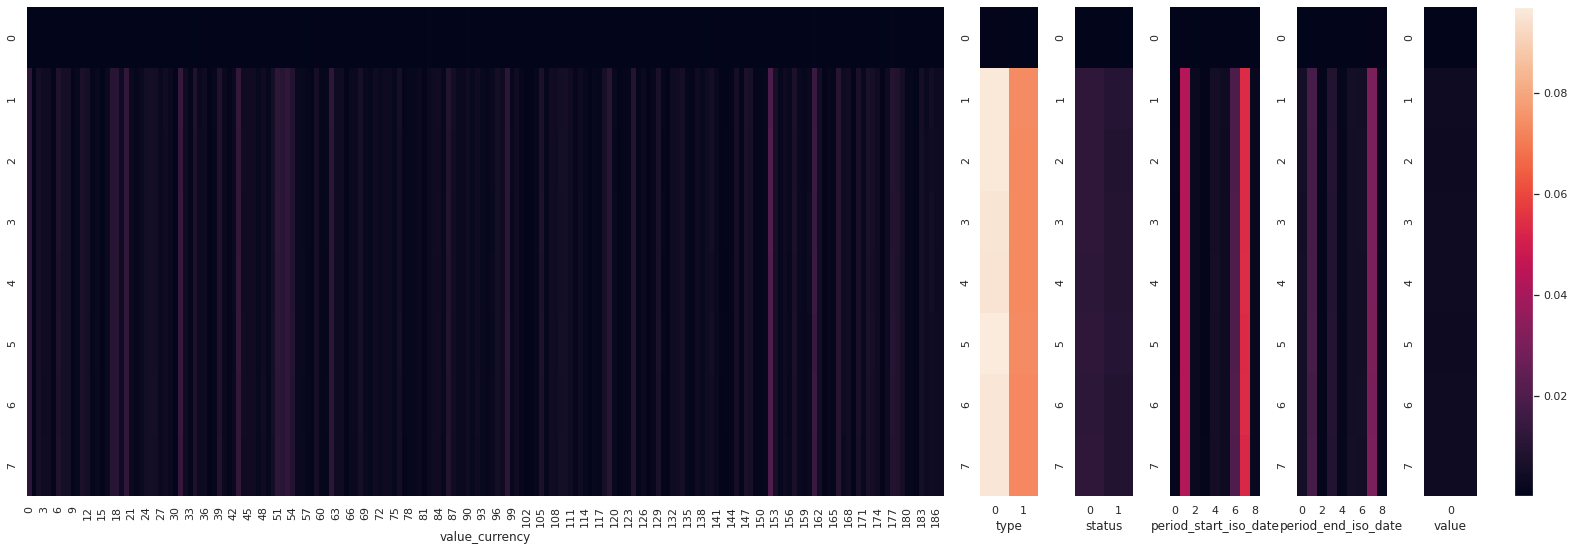

In [10]:
_ = diagnostics.heatmaps(val_output_var,rel,type_="fields")

vmin -1.0 vmax 1.0000001
(367044, 211)


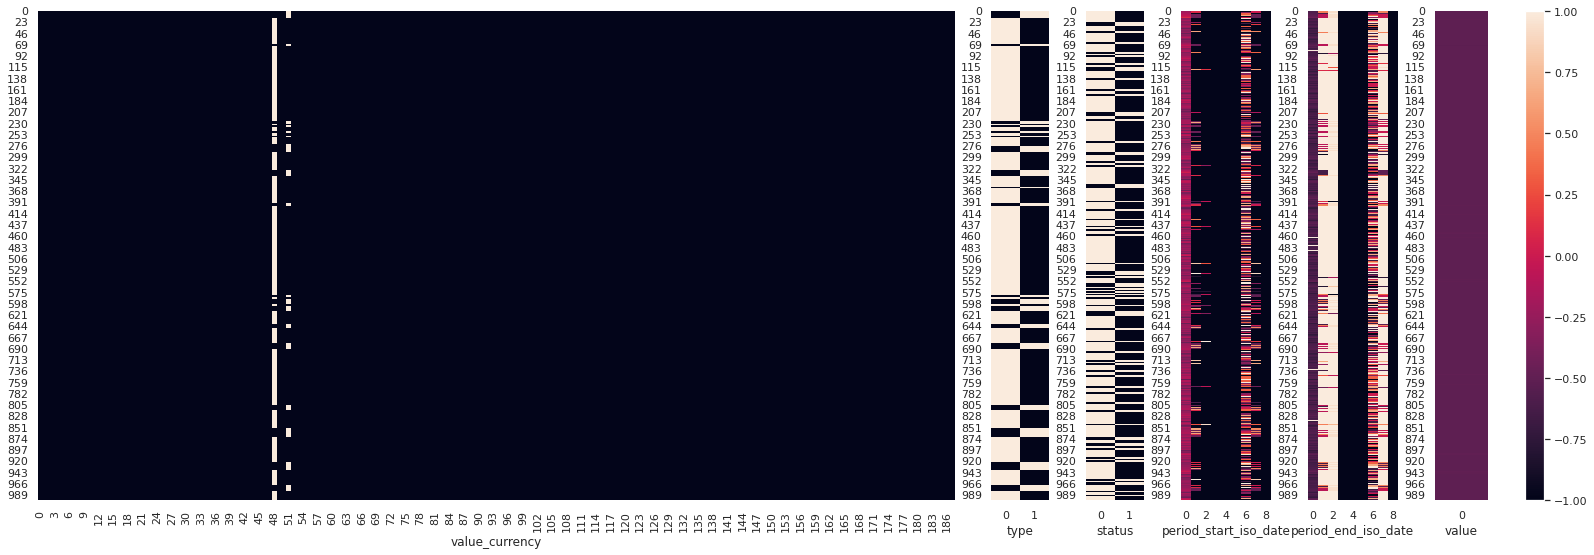

In [20]:
train_ds, test_ds = utils.load_tsets('budget',with_set_index=False)
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1.0,1.0))
scaler.fit(train_ds)
train_ds_scaled = scaler.transform(train_ds)
test_ds_scaled = scaler.transform(test_ds)
#section_orig = train_ds[550:650,27:36]
#section = train_ds_scaled[550:650,27:36]
section = train_ds_scaled[-1000:,:]
_ = diagnostics.heatmaps(section,rel,type_="fields")
import importlib
importlib.reload(utils)
utils.set_np_printoptions()
print(train_ds_scaled.shape)
#print(section_orig)
#print(section)
#print(np.vstack([list(range(train_ds.shape[1])),np.max(train_ds,axis=0)]).T)

In [12]:
relspecs.rels['budget'].fields[0].codelist_name
len(relspecs.get_codelists()['Currency'])
188+2+2+9+9+1,rel.fields_names

(211,
 ['value_currency',
  'type',
  'status',
  'period_start_iso_date',
  'period_end_iso_date',
  'value'])

In [13]:
import persistency
db = persistency.mongo_db()
print([x['name'] for x in db.list_collections()])

['npas_tsets', 'budget', 'npas', 'budget_arrayfied', 'budget_encoded', 'codelists']


In [14]:
for k,v in db['budget_encoded'].find_one()['set_'].items():
    print(k)
    print(np.array(v).shape,np.array(v))
import utils
import pymongo
document = db['budget_arrayfied'].find().sort('_id', pymongo.DESCENDING).limit(1)[0]
npa = utils.deserialize(document['npa'])
print("npa.shape",npa.shape)

type
(1, 2) [[0 1]]
status
(1, 2) [[0 1]]
period_start_iso_date
(1, 9) [[2017    1    1    0    0    0    6    1   -1]]
period_end_iso_date
(1, 9) [[2017   12   31    0    0    0    6  365   -1]]
value_currency
(1, 188) [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
value
(1,) [7.31e+05]
npa.shape (1, 211)


In [15]:
train_dataset,test_dataset = utils.load_tsets(rel.name)
print("train_dataset.shape",train_dataset.shape)
print(train_dataset[0:1000,0]%100)

train_dataset.shape (367044, 212)
[0 1 2 3 4 7 8 10 11 12 14 15 18 19 21 22 23 24 25 26 27 28 29 30 31 33 37 38 39 40 41 42 43 44 45 46 47 48 49 51 52 53 54 55 56 58 60 61 62 63 64 66 67 68 69 71 72 73 75 76 77 78 80 83 84 85 88 89 91 92 94 95 96 98 99 0 2 3 4 5 7 10 11 12 13 16 18 20 21 23 24 26 27 28 29 30 31 32 35 37 38 39 40 41 42 43 46 48 49 51
 53 55 56 62 64 65 66 67 68 69 70 71 72 74 76 77 78 79 81 82 83 84 86 87 89 91 93 94 95 96 98 99 0 1 2 3 4 5 7 8 9 10 13 14 15 16 19 20 21 22 25 26 27 29 30 32 33 35 37 38 40 41 42 43 44 45 46 48 49 50 52 54 55 56 57 58 59 60 63 64 65 66 67 72 73 74 77 78 79 80 81 82 83 84 86 87 89 90 91 92 95 96 97 0 1 2 3 5 6 7 10
 11 12 14 16 17 18 19 20 21 22 27 28 29 31 32 33 35 36 38 39 40 41 42 44 45 47 50 51 52 53 54 55 56 57 58 59 60 61 63 64 66 67 68 70 72 73 78 79 80 81 82 83 84 86 87 88 90 91 92 94 95 96 97 98 99 0 1 2 3 4 5 6 8 10 14 16 17 18 19 20 21 22 23 26 28 29 30 31 33 34 35 36 37 38 39 40 41 42 45 46 47 48 49 50 52 53 54 56
 58 60 61 63 

vmin 0.7273937 vmax 1.0103998
[[1.01]
 [0.727]
 [0.727]
 [0.727]
 [0.727]
 [0.727]
 [0.727]
 [0.727]]


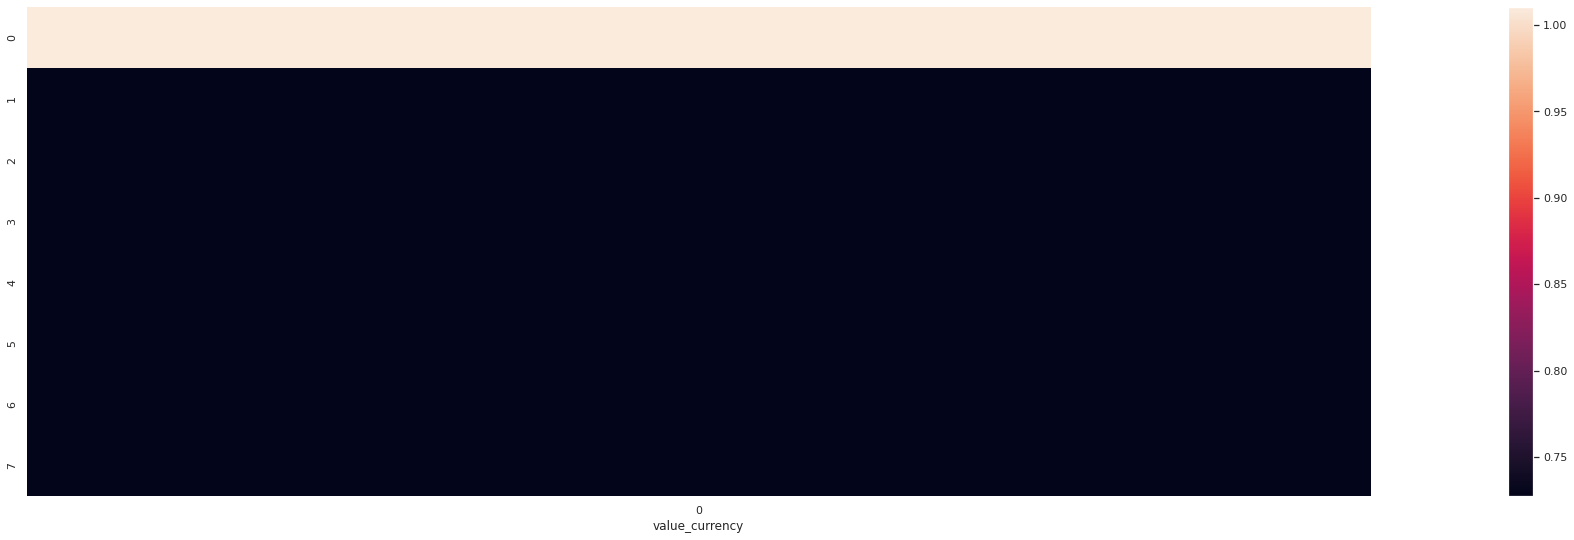

In [16]:
mean_losses_val = load("mean_losses_val")
importlib.reload(diagnostics)
_ = diagnostics.heatmaps(mean_losses_val, rel,type_="losses")
print(mean_losses_val)